In [16]:
#Imports and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn

# For train/test splitting
from sklearn.model_selection import train_test_split

# For vectorizing text
from sklearn.feature_extraction.text import TfidfVectorizer

# For Score Accurecy Evaluation
from sklearn.metrics import accuracy_score

# Four example ML classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#  Loading data, show it works

df = pd.read_csv('datasets/all_preprocessed.csv')

print("=== Data Info ===")
df.info()

print("\n=== Head of Data ===")
display(df.head())


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27770 entries, 0 to 27769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_path    27770 non-null  object
 1   text         27770 non-null  object
 2   text_length  27770 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 651.0+ KB

=== Head of Data ===


,file_path,text,text_length
0,Smaller_Dataset/cv-corpus-18.0-delta-2024-06-1...,She hides her grief and joins in the homecomin...,10
1,Smaller_Dataset/cv-corpus-18.0-delta-2024-06-1...,Proksch stayed at the palace of his personal f...,13
2,Smaller_Dataset/cv-corpus-18.0-delta-2024-06-1...,She had an uneventful career.,5
3,Smaller_Dataset/cv-corpus-18.0-delta-2024-06-1...,Let's eat the chocolate tonight.,5
4,Smaller_Dataset/cv-corpus-18.0-delta-2024-06-1...,Newport was a county borough.,5


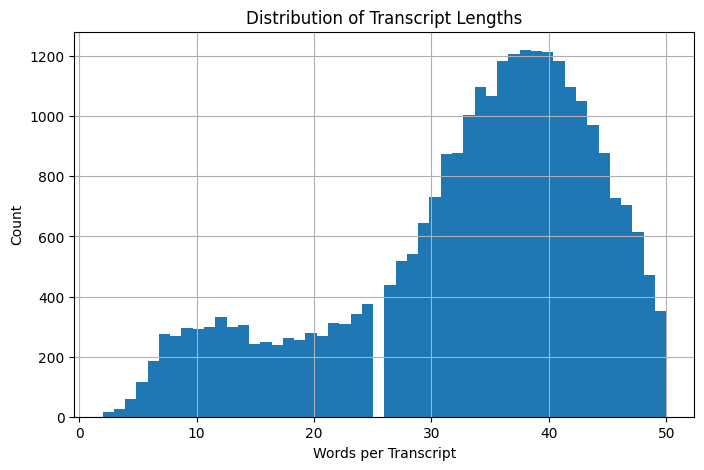


=== Transcript Length Stats ===


count    27770.000000
mean        33.246849
std         11.089929
min          2.000000
25%         28.000000
50%         36.000000
75%         41.000000
max         50.000000
Name: text_length, dtype: float64


=== Sample of 5 Records ===


,file_path,text,text_length,label_column
10452,Smaller_Dataset/train 100/3374-298025-0015.flac,THE MORNING CERTAINLY DESERVES TO BE CALLED BE...,34,1
14902,Smaller_Dataset/train 100/458-126290-0011.flac,I NEVER HEARD THE NAME IN MY LIFE I'LL WAGER A...,48,1
6946,Smaller_Dataset/train 100/250-142276-0016.flac,TO FIND THE CAUSE FOR THE LINES THAT SPOKE SO ...,41,1
3181,Smaller_Dataset/train 100/1624-168623-0017.flac,A TATTERED CONSCIENCE ENTAILS A FRAGMENTARY LI...,31,1
27708,Smaller_Dataset/train 100/911-128684-0051.flac,THE COMMON SENSE STAGE OF THOUGHT IS A PERFECT...,28,1



=== TF-IDF Vectorization ===
Shape of X (rows, TF-IDF features): (27770, 5000)
Train set size: (22216, 5000), Test set size: (5554, 5000)


In [38]:
#Data formating, cleaning, and Train/Test Split

# mnote: more data cleaning can be done here

# Distribution of text length
plt.figure(figsize=(8,5))
df['text_length'].hist(bins=50)
plt.xlabel('Words per Transcript')
plt.ylabel('Count')
plt.title('Distribution of Transcript Lengths')
plt.show()

# Show text length stats
print("\n=== Transcript Length Stats ===")
display(df['text_length'].describe())

# Random sample
print("\n=== Sample of 5 Records ===")
display(df.sample(5))

#  check correlations (dont absolutely need this but why not)

numeric_cols = ['text_length']  
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    print("\n=== Correlation Matrix ===")
    print(corr_matrix)
    plt.matshow(corr_matrix, cmap='viridis')
    plt.colorbar()
    plt.show()

# 5)  Defining the target label

TARGET_COLUMN = "label_column"  # <-- if it ex

# if theresno label, we will create a fake one
if TARGET_COLUMN not in df.columns:
    print(f"'{TARGET_COLUMN}' not found. Creating a FAKE label for demonstration.")
    df[TARGET_COLUMN] = (df['text_length'] > 10).astype(int)

y = df[TARGET_COLUMN]


# Text vectorization 

#  the cleaned text column 'text_clean'


vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to keep it manageable
X = vectorizer.fit_transform(df['text'])

print("\n=== TF-IDF Vectorization ===")
print("Shape of X (rows, TF-IDF features):", X.shape)


# Train, test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")


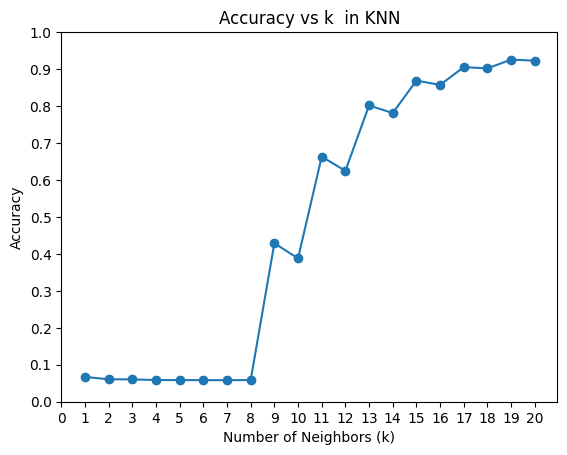

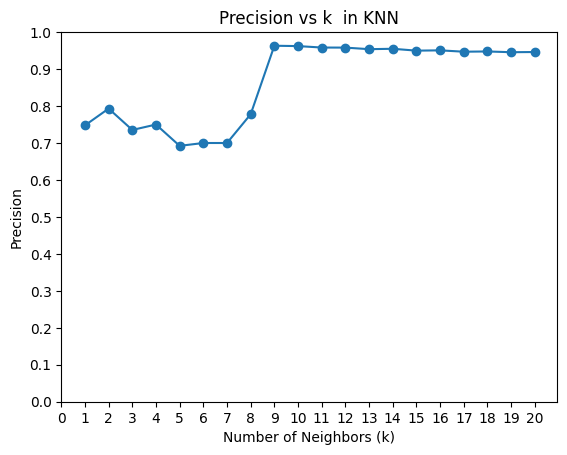

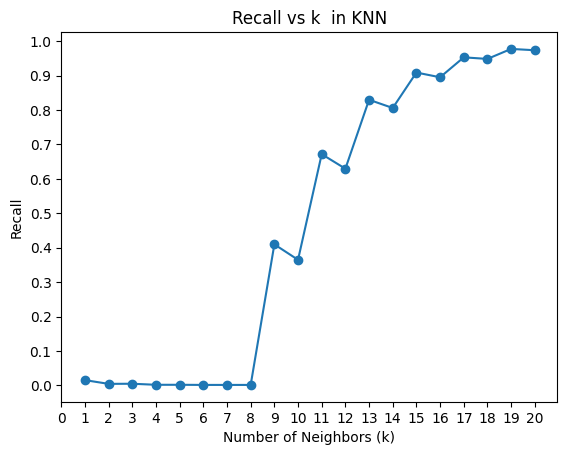

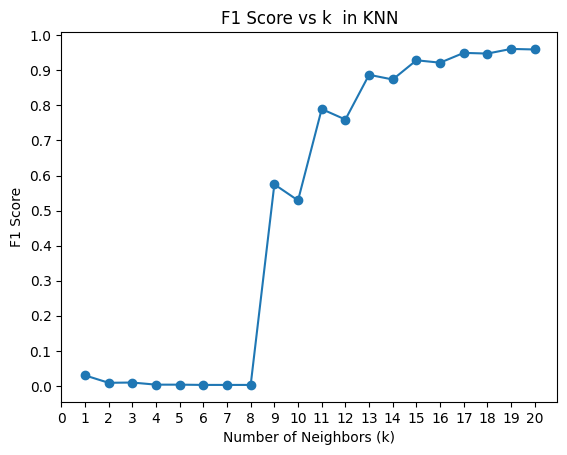

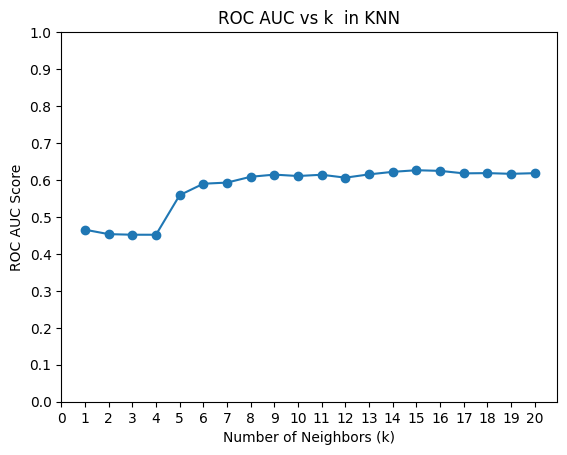

Best k (based on Accuracy): 19
Highest Accuracy: 0.93
Highest Precision: 0.96
Highest Recall: 0.98
Highest F1 Score: 0.96
Highest ROC AUC Score: 0.63


In [18]:
#Test KNN, iterating k to find the best k value

#k_error_graph = []
best_k = 0
accuracy_scores = []
best_accuracy = 0
precision_scores = []
best_precision = 0
recall_scores = []
best_recall = 0
f1_scores = []
best_f1 = 0
roc_auc_scores = []
best_roc_auc = 0

#iterate in a range between 1 and 21 for k
for k in range(1, 21): 
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    #set different score values
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    precision_scores.append(precision)
    
    recall = recall_score(y_test, y_pred, zero_division=0)
    recall_scores.append(recall)
    
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_scores.append(f1)
    
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append(roc_auc)
    
    
    # Update best k and different scores if current k performs better
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
    if precision > best_precision:
        best_precision = precision
    if recall > best_recall:
        best_recall = recall
    if f1 > best_f1:
        best_f1 = f1
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
    

    
# Graph Results
import matplotlib.pyplot as plt

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xticks(range(0, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k  in KNN')
plt.show()

plt.plot(range(1, 21), precision_scores, marker='o')
plt.xticks(range(0, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision')
plt.title('Precision vs k  in KNN')
plt.show()

plt.plot(range(1, 21), recall_scores, marker='o')
plt.xticks(range(0, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.title('Recall vs k  in KNN')
plt.show()

plt.plot(range(1, 21), f1_scores, marker='o')
plt.xticks(range(0, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs k  in KNN')
plt.show()

plt.plot(range(1, 21), roc_auc_scores, marker='o')
plt.xticks(range(0, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC vs k  in KNN')
plt.show()

# Type Results
print(f"Best k (based on Accuracy): {best_k}")
print(f"Highest Accuracy: {best_accuracy:.2f}")
print(f"Highest Precision: {best_precision:.2f}")
print(f"Highest Recall: {best_recall:.2f}")
print(f"Highest F1 Score: {best_f1:.2f}")
print(f"Highest ROC AUC Score: {best_roc_auc:.2f}")


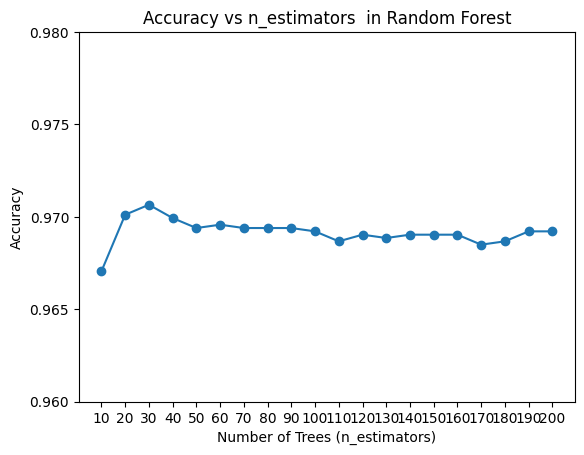

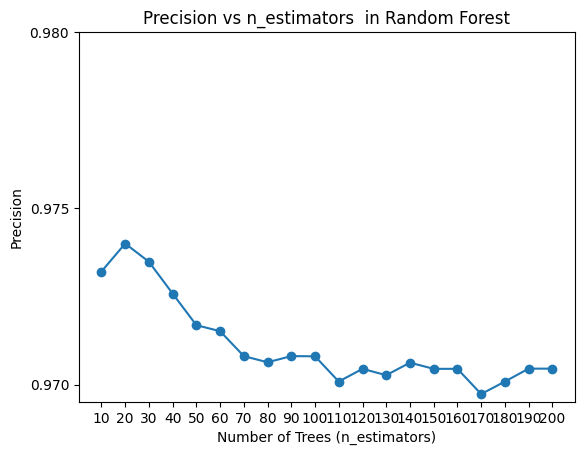

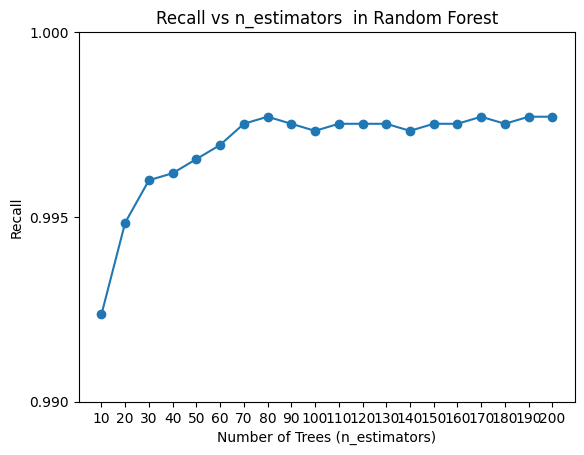

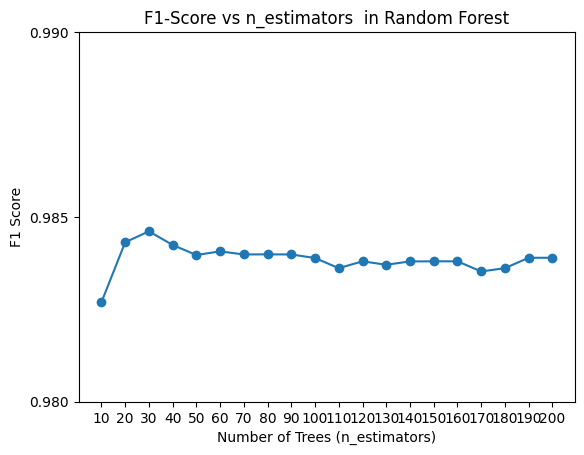

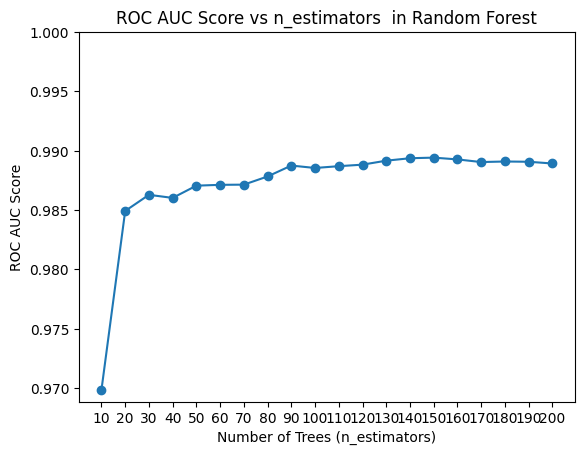

Best n estimators (based on Accuracy): 30
Highest Accuracy: 0.97
Highest Precision: 0.97
Highest Recall: 1.00
Highest F1 Score: 0.98
Highest ROC AUC Score: 0.99


In [29]:
# Test Random Forest, iterating through the best n_estimators for the best accuracy and other scores

best_n = 0

accuracy_scores = []
best_accuracy = 0
precision_scores = []
best_precision = 0
recall_scores = []
best_recall = 0
f1_scores = []
best_f1 = 0
roc_auc_scores = []
best_roc_auc = 0

for n in range(10, 201, 10):  # Test n_estimators from 10 to 200 in steps of 10
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    #set different score values
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((n, accuracy))
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    precision_scores.append((n, precision))
    
    recall = recall_score(y_test, y_pred, zero_division=0)
    recall_scores.append((n, recall))
    
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_scores.append((n, f1))
    
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append((n, roc_auc))
    
    
    # Update best n and different scores if current k performs better
    if accuracy > best_accuracy:
        best_n = n
        best_accuracy = accuracy
    if precision > best_precision:
        best_precision = precision
    if recall > best_recall:
        best_recall = recall
    if f1 > best_f1:
        best_f1 = f1
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc



# Graph the results
import matplotlib.pyplot as plt

plt.plot([x[0] for x in accuracy_scores], [x[1] for x in accuracy_scores], marker='o')
plt.xticks(np.arange(10, 201, 10))
plt.yticks(np.arange(0.96, 0.98, 0.005))
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators  in Random Forest')
plt.show()

plt.plot([x[0] for x in precision_scores], [x[1] for x in precision_scores], marker='o')
plt.xticks(np.arange(10, 201, 10))
plt.yticks(np.arange(0.97, 0.98, 0.005))
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Precision')
plt.title('Precision vs n_estimators  in Random Forest')
plt.show()

plt.plot([x[0] for x in recall_scores], [x[1] for x in recall_scores], marker='o')
plt.xticks(np.arange(10, 201, 10))
plt.yticks(np.arange(0.99, 1.00, 0.005))
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Recall')
plt.title('Recall vs n_estimators  in Random Forest')
plt.show()

plt.plot([x[0] for x in f1_scores], [x[1] for x in f1_scores], marker='o')
plt.xticks(np.arange(10, 201, 10))
plt.yticks(np.arange(0.98, 0.99, 0.005))
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('F1 Score')
plt.title('F1-Score vs n_estimators  in Random Forest')
plt.show()

plt.plot([x[0] for x in roc_auc_scores], [x[1] for x in roc_auc_scores], marker='o')
plt.xticks(np.arange(10, 201, 10))
plt.yticks(np.arange(0.97, 1.00, 0.005))
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score vs n_estimators  in Random Forest')
plt.show()

# Type Results
print(f"Best n estimators (based on Accuracy): {best_n}")
print(f"Highest Accuracy: {best_accuracy:.2f}")
print(f"Highest Precision: {best_precision:.2f}")
print(f"Highest Recall: {best_recall:.2f}")
print(f"Highest F1 Score: {best_f1:.2f}")
print(f"Highest ROC AUC Score: {best_roc_auc:.2f}")

In [34]:

# Train 4 classfifers and show samples of each

#chosen value comparing resource time and accuracy
best_n = 30
best_k = 11

models = {
    "Logistic Regression"    : LogisticRegression(max_iter=1000),
    "Random Forest"          : RandomForestClassifier(n_estimators=best_n,
                                                      random_state=42),
    "K‑Nearest Neighbors"    : KNeighborsClassifier(n_neighbors=best_k),
    "Support Vector Machine" : SVC()                     # default kernel='rbf'
}

for name, model in models.items():
    model.fit(X_train, y_train)      # train
    preds = model.predict(X_test)    # TEST (no metrics..yet...)
    print(f"\n {name} trained.")
    print("   Sample predictions:", preds[:10]) # shows first 10 as a sample



 Logistic Regression trained.
   Sample predictions: [1 1 1 1 1 1 1 1 1 1]

 Random Forest trained.
   Sample predictions: [1 1 1 1 1 1 0 1 1 1]

 K‑Nearest Neighbors trained.
   Sample predictions: [0 1 1 1 0 1 0 1 1 1]

 Support Vector Machine trained.
   Sample predictions: [1 1 1 1 1 1 1 1 1 1]


,Accuracy,Precision,Recall,F1‑Score,ROC‑AUC
Model,,,,,
Logistic Regression,0.951,0.952,0.998,0.975,0.947
Random Forest,0.971,0.973,0.996,0.985,0.986
K‑Nearest Neighbors,0.663,0.958,0.672,0.790,0.614
Support Vector Machine,0.947,0.947,1.000,0.973,0.959


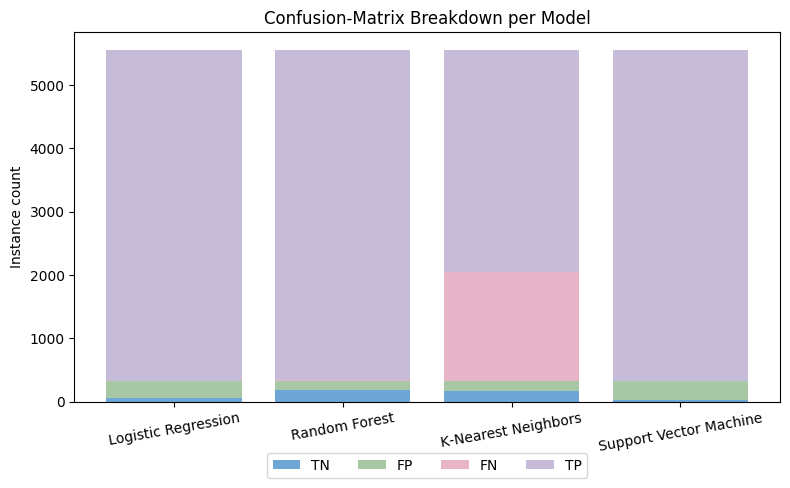

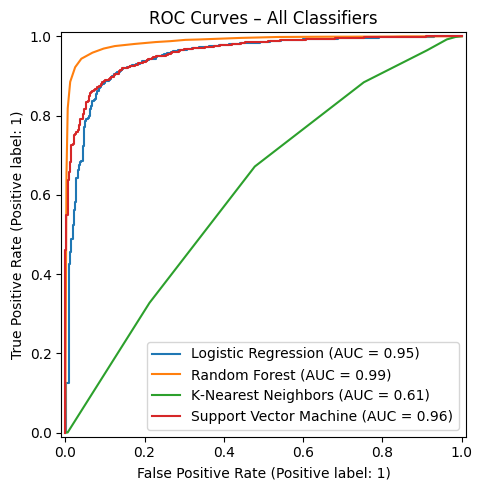

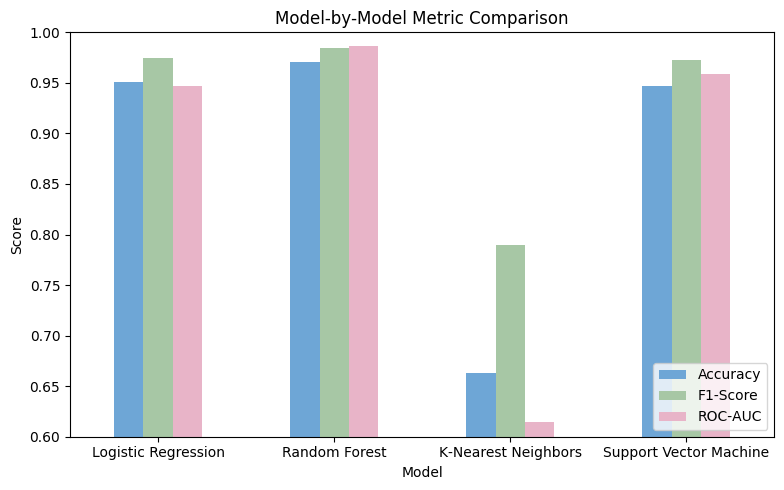


Best Accuracy : Random Forest
Best F1‑Score : Random Forest
Best ROC‑AUC  : Random Forest


In [40]:

#  Overall Evaluation :

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

#  Collect metrics for every model

metric_table = []
labels = ["TN", "FP", "FN", "TP"]               # will reuse for stacked bar
conf_counts = {lab: [] for lab in labels}       # store CM counts per model

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Probabilities / decision scores for ROC‑AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Basic metrics
    metric_table.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred, zero_division=0),
        "Recall"    : recall_score(y_test, y_pred, zero_division=0),
        "F1‑Score"  : f1_score(y_test, y_pred, zero_division=0),
        "ROC‑AUC"   : roc_auc_score(y_test, y_prob)
    })
    
    # Confusion‑matrix counts for stacked‑bar plot
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_counts["TN"].append(tn)
    conf_counts["FP"].append(fp)
    conf_counts["FN"].append(fn)
    conf_counts["TP"].append(tp)

metrics_df = pd.DataFrame(metric_table).set_index("Model")
display(metrics_df.style.format("{:.3f}"))


# Visualization 1 – Stacked bar of confusion‑matrix counts

x = np.arange(len(models))
plt.figure(figsize=(8, 5))
bottom = np.zeros(len(models))

# colour list chosen for readability
cols = [ "#6EA6D6", "#A7C7A5", "#E8B4C8" ,"#C6BCD8"]

for lab, color in zip(labels, cols):
    plt.bar(x, conf_counts[lab], bottom=bottom, label=lab, color=color)
    bottom += conf_counts[lab]

plt.xticks(x, models.keys(), rotation=10)
plt.ylabel("Instance count")
plt.title("Confusion‑Matrix Breakdown per Model")
plt.legend(ncol=4, bbox_to_anchor=(0.5, -0.12), loc="upper center")
plt.tight_layout()
plt.show()

# Visualization 2: ROC curves for all models

plt.figure(figsize=(7, 5))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    else:
        scores = model.decision_function(X_test)
    RocCurveDisplay.from_predictions(
        y_test, scores, name=name, ax=plt.gca(), plot_chance_level=False
    )

plt.title("ROC Curves – All Classifiers")
plt.tight_layout()
plt.show()

# Visualization 3 : Bar chart:  key scalar metrics

painting = [
    "#6EA6D6", 
    "#A7C7A5", 
    "#E8B4C8"   
]
metrics_df[["Accuracy", "F1‑Score", "ROC‑AUC"]].plot(
    kind="bar", figsize=(8, 5), rot=0, ylim=(0.6, 1.0), color = painting #custom-colors
)
plt.title("Model‑by‑Model Metric Comparison")
plt.ylabel("Score")
plt.yticks(np.arange(0.6, 1.01, 0.05))
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# text summary 

best_metrics = metrics_df.idxmax()
print("\nBest Accuracy :", best_metrics['Accuracy'])
print("Best F1‑Score :", best_metrics['F1‑Score'])
print("Best ROC‑AUC  :", best_metrics['ROC‑AUC'])


# 